## <center> Akhilesh Bhaugeerutty & Magib Seck & Mouad Tai <b/>
### <center> Exercices Python

#### Exercices à rendre pour le 01/02:
Exercice 4 page 94 & Exercice 3 page 101.

## Exercice 1


On charge les données dans un dataframe 'credit':

In [117]:
import pandas as pd
import numpy as np 
credit = pd.read_pickle("Downloads/credit.pkl")
credit.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,+
1,58.67,4.460,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,+
2,24.50,0.500,1.50,0.0,280.0,824.0,1,0,0,1,...,0,1,1,0,1,0,1,0,0,+
3,27.83,1.540,3.75,5.0,100.0,3.0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,+
4,20.17,5.625,1.71,0.0,120.0,0.0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,+


La colonne que l'on cherche à prédire est A16, qui est soit un '+' ou un '-'. On utilisera donc celle-ci comme variable Y, le reste des variables dans X, une matrice de 46 colonnes.

On crée les échantillons de test & d'apprentissage, en faisant une répartition 75%/25%:

In [118]:
from sklearn.model_selection import train_test_split
variables = [x for x in credit.columns if x!='A16'] 
X = credit[variables] 
Y = credit['A16']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=2018)

On doit normaliser (scaler) les données pour que chaque variable ait une importance proportionnelle par rapport à la variable de sortie, du fait empêchant de créer un bias. De plus, scaler a plusieurs avantages:

1. Cela nous empêche de rester bloqué sur des optimums locaux plutôt que globaux
2. On a une meilleure surface pour la visualisation des erreurs
3. Les calculs soient bien plus rapides: les algorithmes de descente convergent rapidement

Pour faire un scaling des données (c'est à dire de la matrice X), il faut utiliser le Scaler de sklearn:

In [119]:
from sklearn.preprocessing import StandardScaler 
s = StandardScaler() 
s.fit(X) 
X_train_scaled = s.transform(X_train) 
X_test_scaler = s.transform(X_test)

A présent, on va lancer l'apprentissage des données:

#### SVM Linéaire:

In [120]:
from sklearn.svm import SVC 
clf = SVC(C=1, kernel='linear')
clf.fit(X_train_scaled,Y_train)
Y_pred = clf.predict(X_test_scaler)

On va tester la précision du modèle, en calculant la moyenne des TP et TN:

In [121]:
from sklearn.metrics import accuracy_score as acc
acc(Y_test, Y_pred)

0.8658536585365854

Une précision de 86% est très bonne, considérant le peu de données que nous avons. 

#### SVM 'Radial Basis Function':

In [128]:
from sklearn.svm import SVC 
cl2 = SVC(C=1, kernel='rbf', gamma = 1/40, probability = True)
cl2.fit(X_train_scaled,Y_train)
Y_pred2 = cl2.predict(X_test_scaler)
acc(Y_test, Y_pred2)

0.8902439024390244

On otient une meilleure précision. <br>
Pour le score AUC, il faut ajouter le paramètre 'probability = True', et ensuite utiliser la built-in function de sklearn:

In [123]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(Y_test,cl2.predict_proba(X_test_scaler)[:,1])

0.9399910434393193

Le score AUC est très positif, aux alentours de 94%.

Nous allons à présent faire une Validation Croisée pour trouver les meilleurs paramètres lors d'un SVM polynomial. 

In [129]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':np.linspace(0.1,10,10),'degree':np.linspace(1,9,10),'gamma':np.linspace(0.01,8,10)}
svm_clf = SVC(kernel='poly')
clf = GridSearchCV(estimator=svm_clf,param_grid=param_grid,scoring='roc_auc',cv=5)
clf.fit(X_train_scaled,Y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ]),
                         'degree': array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
       5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
                         'gamma': array([0.01      , 0.89777778, 1.78555556, 2.67333333, 3.56111111,
       4.44888889, 5.33666667, 6.22444444, 7.11222222, 8.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc'

Les meilleurs paramètres sont obtenus ainsi:

In [132]:
clf.best_params_

{'C': 1.2000000000000002, 'degree': 1.0, 'gamma': 0.01}

On utilise ceux-ci pour calculer le nouveau score AUC:

In [135]:
newcl = SVC(C=1.2, kernel='poly', gamma = 0.01,degree = 1.0, probability = True)
newcl.fit(X_train_scaled,Y_train)
newY_pred = newcl.predict(X_test_scaler)
roc_auc_score(Y_test,newcl.predict_proba(X_test_scaler)[:,1])

0.9314823107926555

La validation croisée prend beaucoup de temps à tourner. Toutefois, on obtient un AUC assez similaire.. On en déduit que le type rbf devait être meilleur, car il n'y a pas eu de Validation Croisée lors de cette étape. 

## Exercice 2


On charge les données 'insurance', puis on les divise en plusieurs échantillons comme auparavant:

In [62]:
insurance = pd.read_pickle("Downloads/insurance.pkl")
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [64]:
variables = [x for x in insurance.columns if x!='charges'] 
X = insurance[variables] 
Y = insurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state=2003)

Une nouvelle fois, on scale les données. On peut reprendre le code d'au dessus

In [65]:
s = StandardScaler() 
s.fit(X) 
X_train_scal = s.transform(X_train) 
X_test_scal = s.transform(X_test)

#### Epsilon-Support Vector Regression (linear)

In [91]:
from sklearn.svm import SVR
SVMR = SVR(kernel='linear', C=200, epsilon=1, gamma = 0.08) 
SVMR.fit(X_train,Y_train)

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.08,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [92]:
from sklearn.metrics import mean_squared_error as mse
mse1 = mse(Y_test,SVMR.predict(X_test))
mse1

61225187.94635586

L'erreur est très importante, il faut recommencer avec les données normalisées. 

In [93]:
from sklearn.metrics import r2_score 

SVMR = SVR(kernel='linear', C=200, epsilon=1, gamma = 0.08) 
SVMR.fit(X_train_scal,Y_train)

print("R2 = "+str(r2_score(Y_test,SVMR.predict(X_test_scal))))

R2 = 0.7460326169450318


On peut comparer aussi avec le mse: 

In [94]:
mse2 = mse(Y_test,SVMR.predict(X_test_scal))
mse2 <= mse1

True

L'erreur moyenne est plus petite avec les données scaled. Il faut donc garder ce modèle. 

#### Epsilon-Support Vector Regression (Polynomial)

In [97]:
SVMRPOLY = SVR(kernel='poly', C=800, epsilon=1, degree=3, gamma = 'auto') 
SVMRPOLY.fit(X_train_scal,Y_train)

SVR(C=800, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [98]:
print("R2 = "+str(r2_score(Y_test,SVMRPOLY.predict(X_test_scal))))

R2 = 0.8158963300754064


Le coefficient $R^2$ a augmenté. Comme on a comparé des modèles de taille similaire, on préfère celui au plus grand $R^2$. 

#### Graphique:

In [108]:
test = []
app = []
for i in range(14):
    sv = SVR(kernel='poly', C=800, epsilon=1, degree=i, gamma = 'auto') 
    sv.fit(X_train_scal,Y_train)
    test.append(r2_score(Y_test,sv.predict(X_test_scal)))
    app.append(r2_score(Y_train,sv.predict(X_train_scal)))


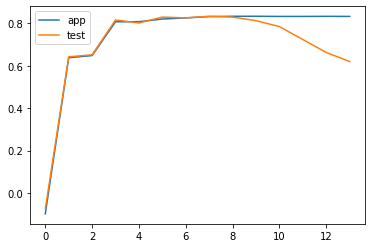

In [114]:
import matplotlib.pyplot as plt
plt.plot(app, label ='app')
plt.plot(test, label = 'test')
plt.legend()

Bien que les deux courbes sont proches et se suivent, on voit qu'à partir d'un certain degré, le $R^2$ calculé avec l'échantillon test diminue. 